In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import copy
from scipy.signal import find_peaks

In [319]:
metadata = pd.read_csv('metadata.csv').fillna(0)
train_labels = pd.read_csv('train_labels.csv')
global_cooh_peaks = []


sample_id   :  S0409
label       :  ['S0409' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
9 184044


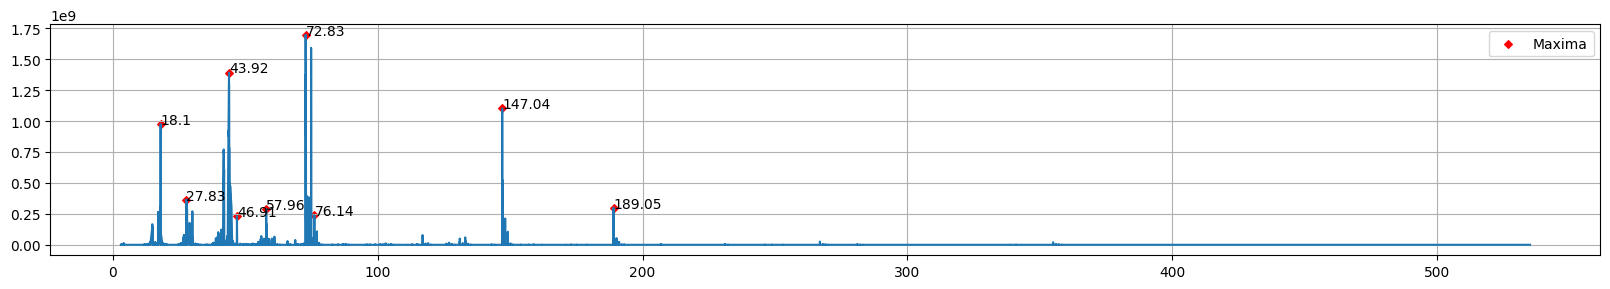

sample_id   :  S0230
label       :  ['S0230' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
8 183974


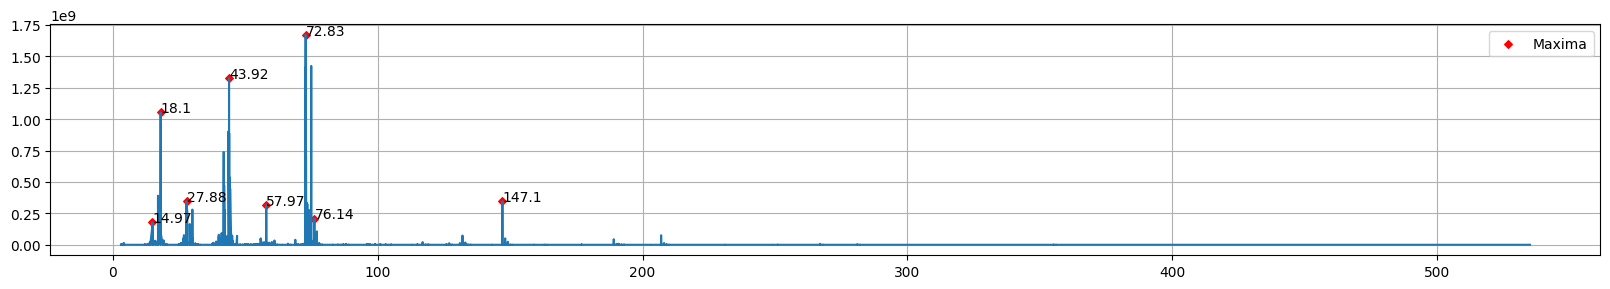

sample_id   :  S0411
label       :  ['S0411' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
3 221290


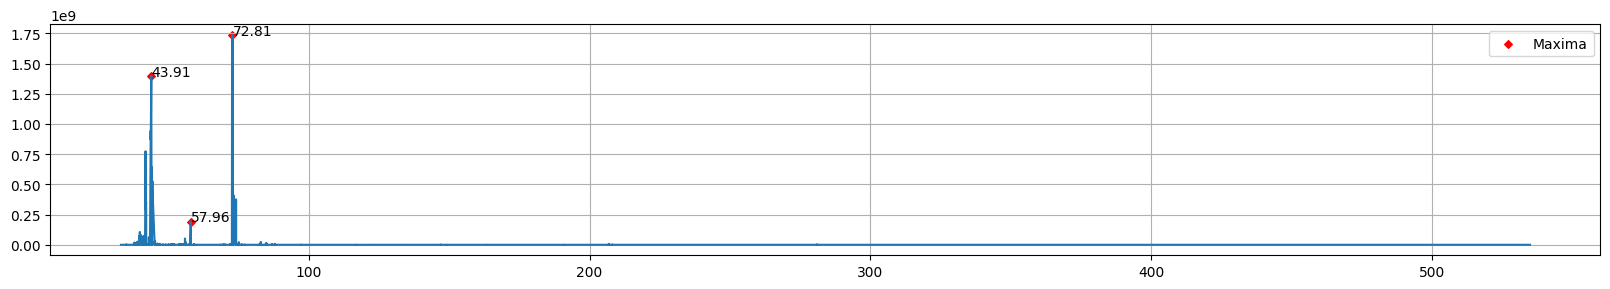

sample_id   :  S0522
label       :  ['S0522' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
7 184201


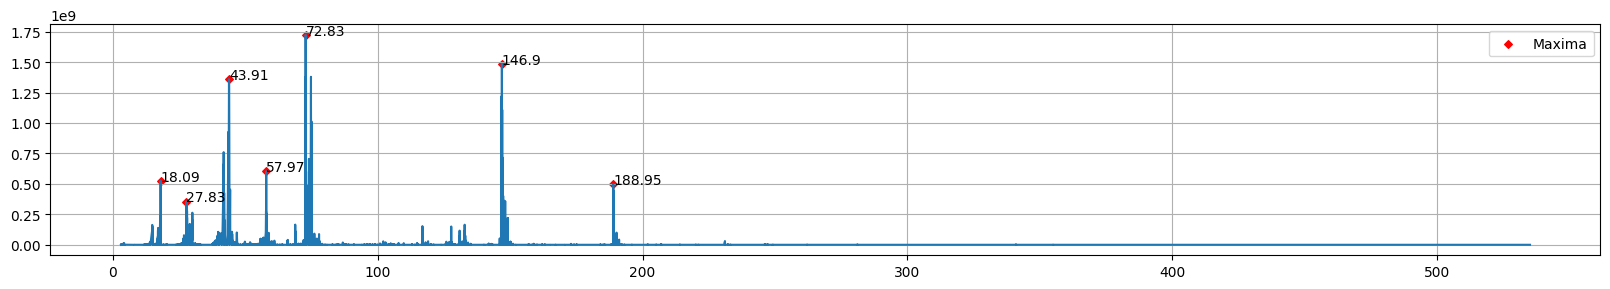

sample_id   :  S0624
label       :  ['S0624' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
8 683642


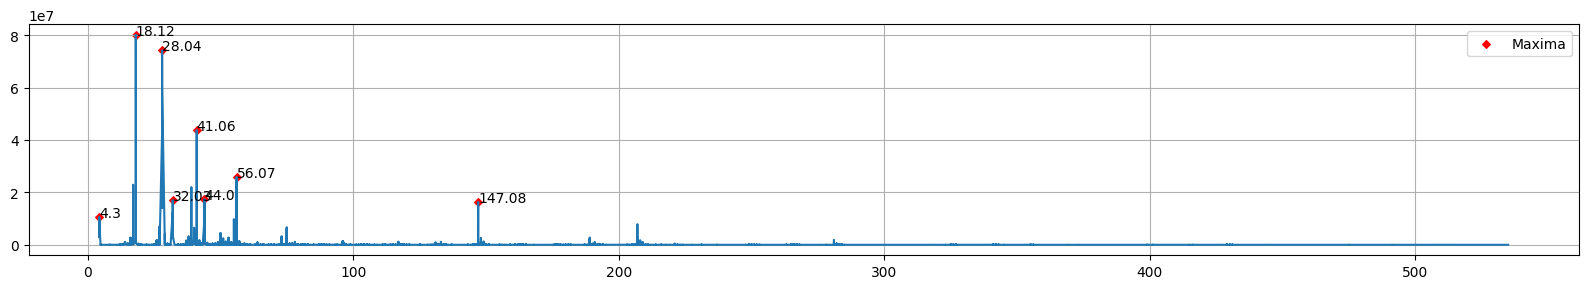

sample_id   :  S0072
label       :  ['S0072' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
9 183543


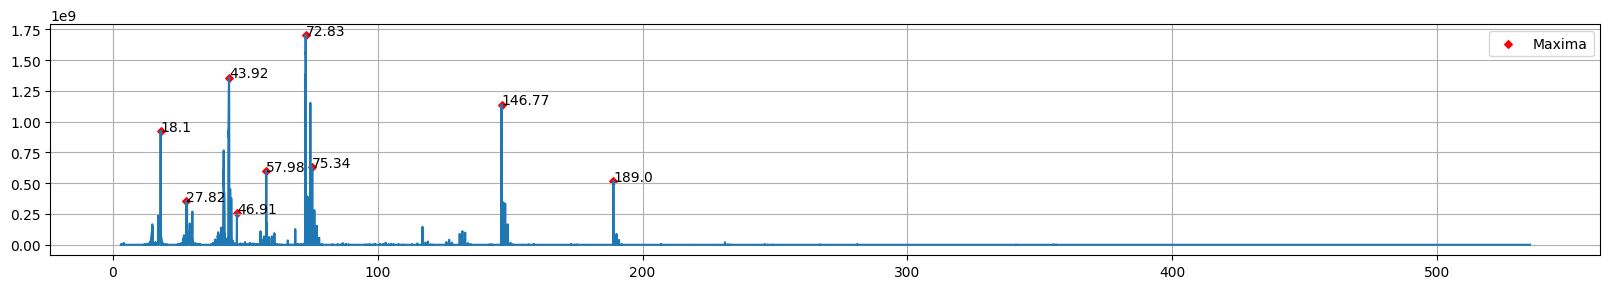

sample_id   :  S0333
label       :  ['S0333' 0 0 0 0 0 0 0 0 1]
derivatized :  0.0
4 183120


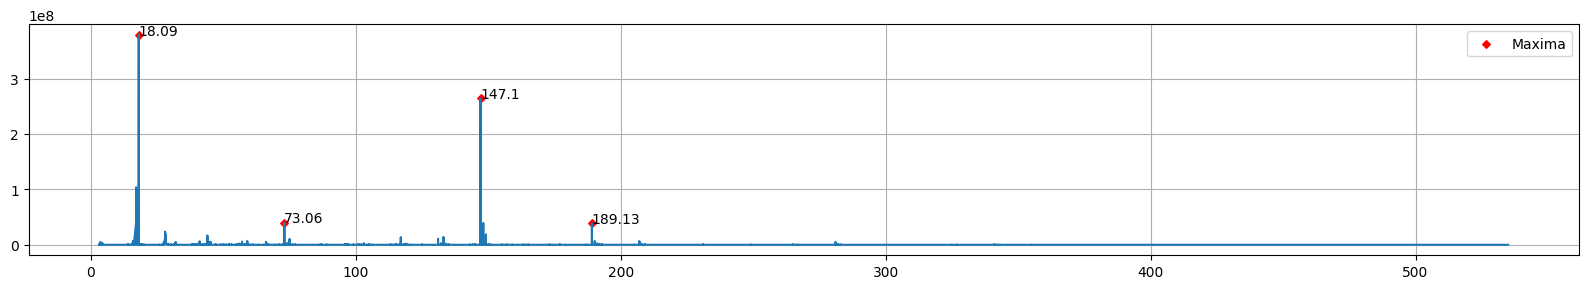

[array([146.836182,  72.789825,  57.946075,  43.870026,  76.919647,
        220.985291, 133.9263  , 188.976227, 183.915894,  27.820679]),
 array([27.891617, 31.944138, 18.116653, 13.992035]),
 array([ 63.960983,  48.000946, 207.046021, 281.103577]),
 array([146.835175,  76.912262, 133.922424, 188.963226,  73.026688,
        183.903931, 232.99469 , 115.060608]),
 array([ 63.969376,  47.99733 , 207.058838,  73.062347, 281.124207,
        267.067993, 253.069275]),
 array([28.01741 , 18.090591, 44.041397, 32.0522  ]),
 array([146.835175,  76.912262, 133.922424, 188.963226,  73.026688,
        183.903931, 232.99469 , 115.060608]),
 array([146.06366 , 188.857758,  72.854767, 230.977783, 148.284851,
        116.898727, 130.807068, 220.98761 ,  75.242966]),
 array([146.881195,  18.051987,  75.060638,  58.059723, 189.026764,
         69.033463,  44.139267, 149.167084]),
 array([28.01741 , 18.090591, 44.041397, 32.0522  ]),
 array([27.891617, 31.944138, 18.116653, 13.992035]),
 array([18.056976,

In [323]:

def plot_peaks(df):
    x = df.mass.values
    y = df.intensity.values
    #Find peaks
    peaks = find_peaks(y, height = max(1e6, y.max()/10), threshold = 10, distance = len(df)*.005)
    height = peaks[1]['peak_heights'] #list of the heights of the peaks
    peak_pos = x[peaks[0]] #list of the peaks positions
    # peak_pos
    # print(height)
    mass_in = np.array(sorted(np.column_stack((peak_pos,height)), key = lambda x: x[1], reverse = True))
    # mass_in_out = mass_in

    
    global_cooh_peaks.append(mass_in[:min(mass_in.shape[0],10),0])
    #Finding the minima
    # y2 = y*-1
    # minima = find_peaks(y2)
    # min_pos = x[minima[0]] #list of the minima positions
    # min_height = y2[minima[0]] #list of the mirrored minima heights
    #Plotting
    print(len(peaks[0] ), len(df))
    fig = plt.figure(figsize=(20,3))
    ax = fig.subplots()
    ax.plot(x,y)
    ax.scatter(peak_pos, height, color = 'r', s = 15, marker = 'D', label = 'Maxima')
    # ax.scatter(min_pos, min_height*-1, color = 'gold', s = 15, marker = 'X', label = 'Minima')
    for i, high in enumerate(height):
        # mass = x[i]
        ax.annotate(((peak_pos[i]*100)//1)/100, (peak_pos[i], high))
    ax.legend()
    ax.grid()
    # plt.xlim([70,75])
    plt.show()


def pltfig(x,y):
    # return
    plt.figure(figsize=(20,3))
    plt.plot( x,y)
    # plt.xlim([0,100])
    plt.autoscale()
    plt.show()

def desribe_data(id):
    data_row = metadata.iloc[id]
    sample_id, split,derivatized,features_path,features_md5_hash = data_row.values
    # print(sample_id, split,derivatized,features_path,features_md5_hash,sep="\n")
    
    label = None
    label_row = None
    if (split == 'train'):
        label_row = train_labels.iloc[id]
        label = label_row.values
    if label[9] == 0 :
        return 1
    if sum(label[1:])!=1 :
        return 1
    print("sample_id   : ",sample_id )
    print("label       : " ,label )
    print("derivatized : " ,derivatized )
    
    # initial data time vs intensity
    data = pd.read_csv(features_path)
    # pltfig(data.time, data.intensity)
    
    # visuals

    
    #data mass vs intensity
    data_mass_int = data
    
    #data mass vs intensity (refined)
    # int causes data loss
    # data_mass_int["mass"] = ((data.mass*2).astype(int))/2
    data_mass_int = data_mass_int.groupby(["mass"]).mean().reset_index()
    # data_mass_int["intensity"] = np.log10(data_mass_int["intensity"])
    # pltfig(data_mass_int.mass, data_mass_int.intensity)


    # approach 2 -- iterate through each mass finding peaks
    data_int = data.sort_values(by="intensity") 
    
    plot_peaks(data_mass_int)
    return 0
for i in range (7): 
    while(desribe_data(np.random.randint(0,808))):
        continue
# for i in range (7): 
#     while()):
#         continue
# desribe_data(np.random.randint(0,808))
# desribe_data(19)
global_cooh_peaks


In [1]:
print(global_cooh_peaks)

NameError: name 'global_cooh_peaks' is not defined